# Assignment 4: Support Vector Machine (SVM) and Model Ensemble {-}

This assignment aims at familiarizing you with training and testing Suppor Vector Machine classification model, along with exploiting the power of model ensemble technics. Here are the BASIC requirements of the assignment:

- Load the data.
- Analyze the data.
- Remove outliers and clean the data.
- Use GridSearchCV to find the best set of SVM hyperparameters.
- Build, train and evaluate the SVM model.
- Separately build, train and evaluate the other four classifiers (Logistic regression, Naive Bayes, Decision Tree, Random Forest) on the same dataset, then compare their performance with the SVM model's.
- Apply three model ensemble technics, i.e., Bagging, Boosting and Stacking, to solve the problem, then compare their performance with each other and with the use of individual models. Draw conclusion from what has been observed.

The dataset you will be working on is 'data-breast-cancer.csv'. It is composed of attributes to build a prediction model.

### Submission {-}
The structure of submission folder should be organized as follows:

- ./\<StudentID>-assignment4-notebook.ipynb: Jupyter notebook containing source code.

The submission folder is named ML4DS-\<StudentID>-Assignment4 (e.g., ML4DS-2012345-Assigment4) and then compressed with the same name.
    
### Evaluation {-}
Assignment evaluation will be conducted on how you accomplish the assignment requirements. It is a plus if you have data exploration and modeling steps other than the basic requirements. In addition, your code should conform to a Python coding convention such as PEP-8.

### Deadline {-}
Please visit Canvas for details.

In [13]:
# Load the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [5]:
# Load the dataset
data = pd.read_csv("data-breast-cancer.csv")

In [6]:
# Show some data samples
data.head()

,Unnamed: 0,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


This is a dataset used to detect whether a patient has breast cancer depending on the following features:

- diagnosis: (label) the diagnosis of breast (label) tissues (M = malignant, B = benign).
- radius: distances from center to points on the perimeter.
- texture: standard deviation of gray-scale values.
- perimeter: perimeter of the tumor.
- area: area of the tumor.
- smoothness: local variation in radius lengths.
- compactness: is equal to (perimeter^2 / area - 1.0).
- concavity: severity of concave portions of the contour.
- concave points: number of concave portions of the contour.
- symmetry: symmetry of the tumor shape.
- fractal dimension: "coastline approximation" - 1.



In [8]:
# Your code goes here
print("Data shape:" + str(data.shape))

Data shape:(569, 12)


In [9]:
data['diagnosis'].replace(['M', 'B'], [0, 1], inplace=True)

In [10]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              569 non-null    int64  
 1   diagnosis               569 non-null    int64  
 2   radius_mean             569 non-null    float64
 3   texture_mean            569 non-null    float64
 4   perimeter_mean          569 non-null    float64
 5   area_mean               569 non-null    float64
 6   smoothness_mean         569 non-null    float64
 7   compactness_mean        569 non-null    float64
 8   concavity_mean          569 non-null    float64
 9   concave points_mean     569 non-null    float64
 10  symmetry_mean           569 non-null    float64
 11  fractal_dimension_mean  569 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 53.5 KB
None


In [11]:
print(data.describe())

       Unnamed: 0   diagnosis  radius_mean  texture_mean  perimeter_mean  \
count  569.000000  569.000000   569.000000    569.000000      569.000000   
mean   284.000000    0.627417    14.127292     19.289649       91.969033   
std    164.400426    0.483918     3.524049      4.301036       24.298981   
min      0.000000    0.000000     6.981000      9.710000       43.790000   
25%    142.000000    0.000000    11.700000     16.170000       75.170000   
50%    284.000000    1.000000    13.370000     18.840000       86.240000   
75%    426.000000    1.000000    15.780000     21.800000      104.100000   
max    568.000000    1.000000    28.110000     39.280000      188.500000   

         area_mean  smoothness_mean  compactness_mean  concavity_mean  \
count   569.000000       569.000000        569.000000      569.000000   
mean    654.889104         0.096360          0.104341        0.088799   
std     351.914129         0.014064          0.052813        0.079720   
min     143.500000     

In [12]:
# Check missing values, outliers
print(data.isnull().sum())

Unnamed: 0                0
diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64


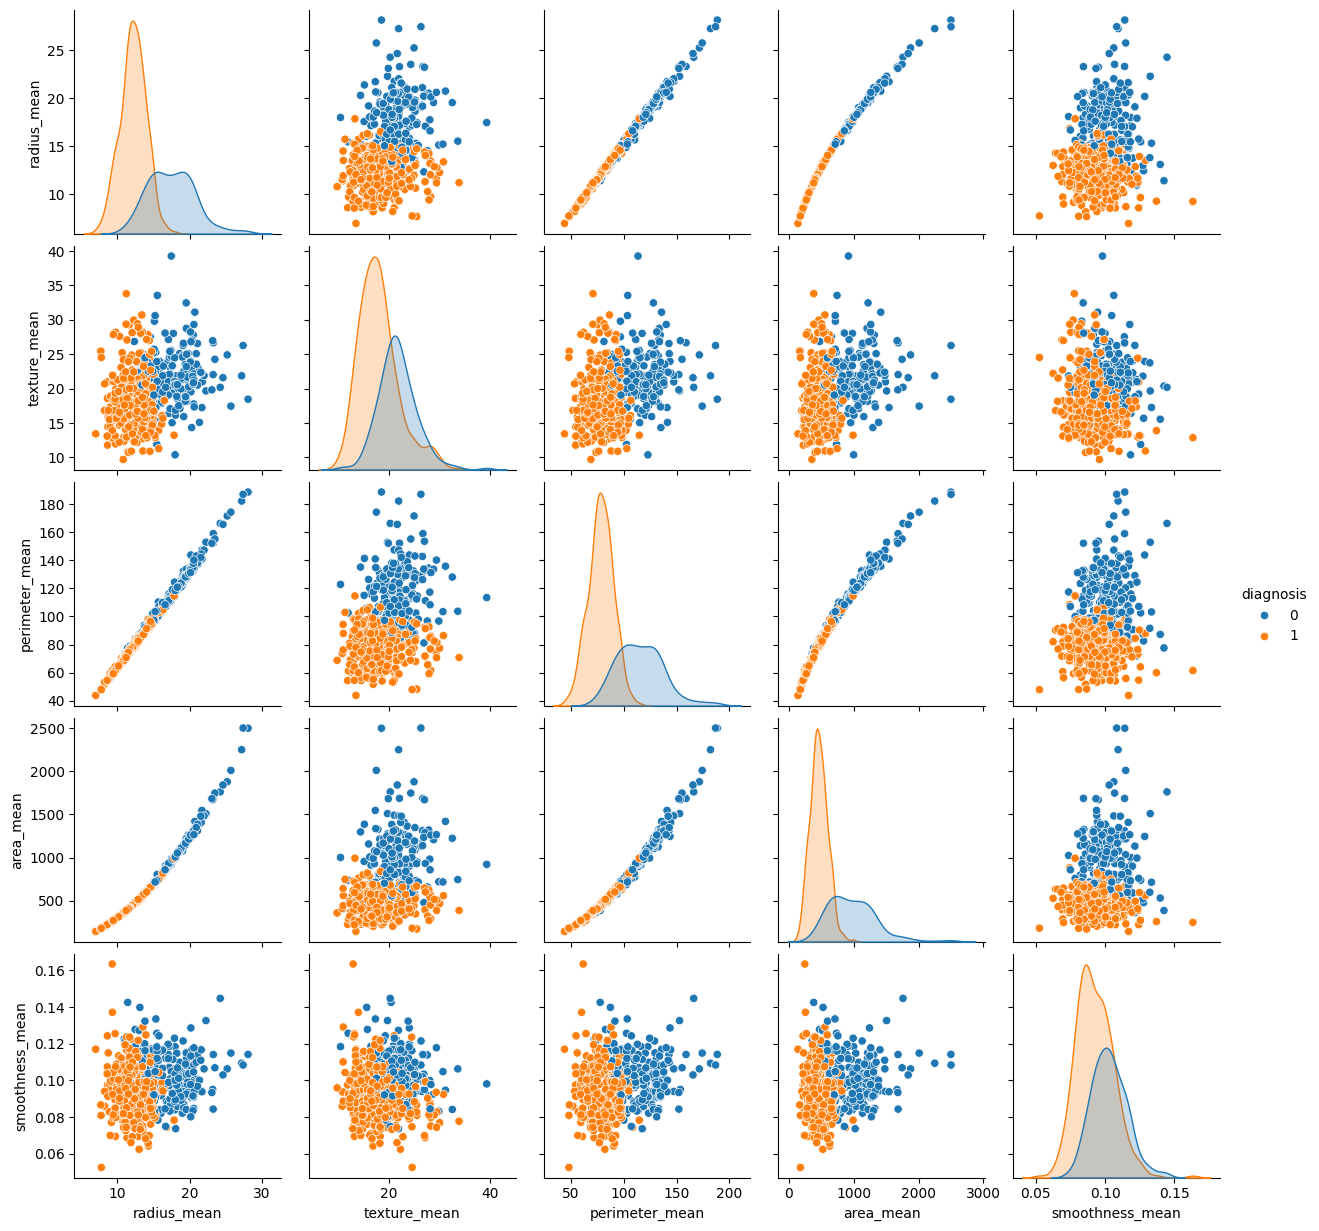

In [14]:
sns.pairplot(data, hue='diagnosis',vars=['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean'])

1.0 (Orange) = Benign (No Cancer)

0.0 (Blue) = Malignant (Cancer)

In [15]:
data['diagnosis'].value_counts()

diagnosis
1    357
0    212
Name: count, dtype: int64

<Axes: xlabel='diagnosis', ylabel='count'>

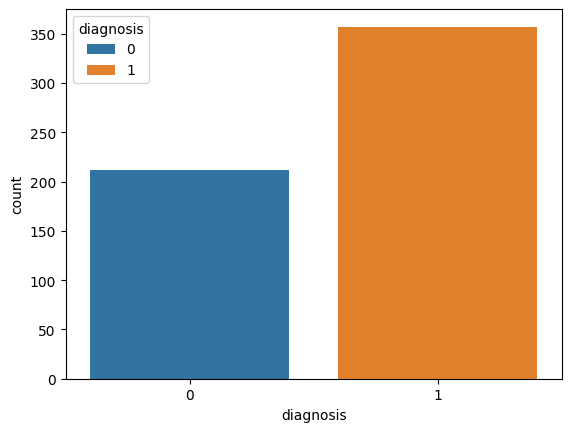

In [16]:
sns.countplot(data, x="diagnosis",hue="diagnosis")

In [17]:
# remove the first unnamed column in data
data.drop(data.columns[0], axis=1, inplace=True)

<Axes: >

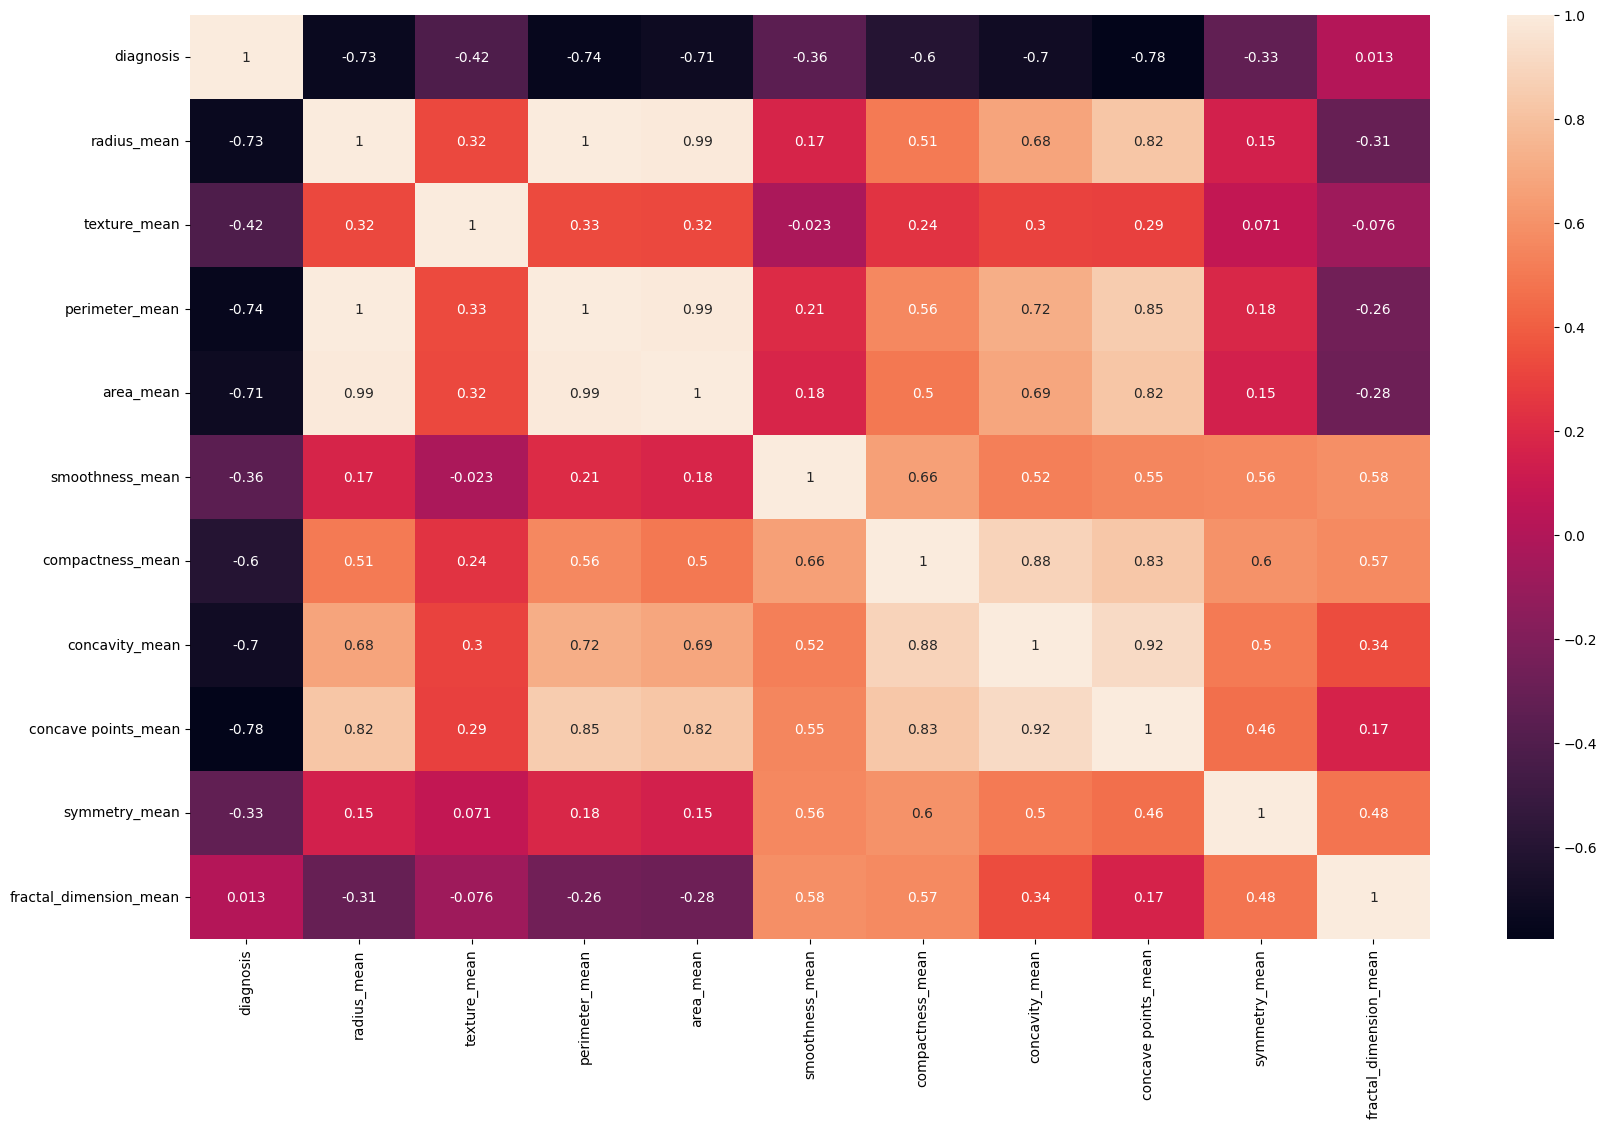

In [18]:
plt.figure(figsize=(20,12))
sns.heatmap(data.corr(), annot=True)

In [32]:
data.shape

(569, 11)

In [20]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

In [21]:
# Separate data features and data labels
X = data.drop(columns = ['diagnosis'])     # Data features
y = data['diagnosis']                      # Data lebels

In [34]:

# Split for training/testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [35]:
print ('The size of our training "X" (input features) is', X_train.shape)
print ('\n')
print ('The size of our testing "X" (input features) is', X_test.shape)
print ('\n')
print ('The size of our training "y" (output feature) is', y_train.shape)
print ('\n')
print ('The size of our testing "y" (output features) is', y_test.shape)

The size of our training "X" (input features) is (455, 10)


The size of our testing "X" (input features) is (114, 10)


The size of our training "y" (output feature) is (455,)


The size of our testing "y" (output features) is (114,)


In [36]:
X_train_min = X_train.min()
X_train_min

radius_mean                 6.98100
texture_mean               10.38000
perimeter_mean             43.79000
area_mean                 143.50000
smoothness_mean             0.05263
compactness_mean            0.01938
concavity_mean              0.00000
concave points_mean         0.00000
symmetry_mean               0.10600
fractal_dimension_mean      0.04996
dtype: float64

In [37]:
X_train_max = X_train.max()
X_train_max

radius_mean                 28.11000
texture_mean                39.28000
perimeter_mean             188.50000
area_mean                 2501.00000
smoothness_mean              0.14470
compactness_mean             0.34540
concavity_mean               0.42680
concave points_mean          0.20120
symmetry_mean                0.30400
fractal_dimension_mean       0.09296
dtype: float64

In [38]:
X_train_normalized =  (X_train - X_train_min)/ (X_train_max - X_train_min)
X_train_normalized.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
412,0.114345,0.391003,0.110290,0.053150,0.293907,0.126219,0.087512,0.025487,0.108081,0.401860
461,0.967343,0.549827,0.988943,1.000000,0.605735,0.550334,0.851687,0.839463,0.505556,0.145814
532,0.317052,0.205882,0.303849,0.183245,0.435973,0.163088,0.041050,0.093439,0.288384,0.269535
495,0.373373,0.340138,0.361620,0.227953,0.469643,0.196522,0.159888,0.246074,0.215657,0.174884
13,0.419755,0.469550,0.414000,0.271135,0.340828,0.247899,0.232849,0.266600,0.397475,0.079535


In [39]:
X_test_min = X_test.min()
X_test_max = X_test.max()
X_test_normalized =  (X_test - X_test_min)/ (X_test_max - X_test_min)
X_test_normalized.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
269,0.143379,0.576674,0.145236,0.079089,0.391132,0.378409,0.250831,0.149869,0.261526,0.389277
263,0.422836,0.522138,0.394236,0.307892,0.062431,0.086702,0.124970,0.148824,0.165342,0.088578
30,0.595072,0.831533,0.596702,0.490072,0.371277,0.618223,0.688539,0.650288,0.670906,0.248358
452,0.216950,1.000000,0.204588,0.133068,0.128281,0.120148,0.120398,0.101673,0.219396,0.228650
214,0.341850,0.761339,0.336027,0.226094,0.241452,0.385226,0.331057,0.337794,0.712242,0.298368


In [40]:
# Parameter Grid
param_grid = {'C': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0, 5.0, 10.0, 100.0], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}

# GridSearchCV with SVM
grid_svc = GridSearchCV(SVC(), param_grid, refit=True, verbose=4)
grid_svc.fit(X_train_normalized, y_train)

print (grid_svc.best_params_)
print ('\n')
print (grid_svc.best_estimator_)

Fitting 5 folds for each of 52 candidates, totalling 260 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.945 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.945 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.879 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.912 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.945 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.780 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.780 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.736 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.780 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.725 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.648 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [41]:
# Evaluation
best_svc = grid_svc.best_estimator_
y_pred = best_svc.predict(X_test_normalized)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9649122807017544
Confusion Matrix:
 [[46  2]
 [ 2 64]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        48
           1       0.97      0.97      0.97        66

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [42]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [43]:
cm = np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,64,2
is_healthy,2,46


<Axes: >

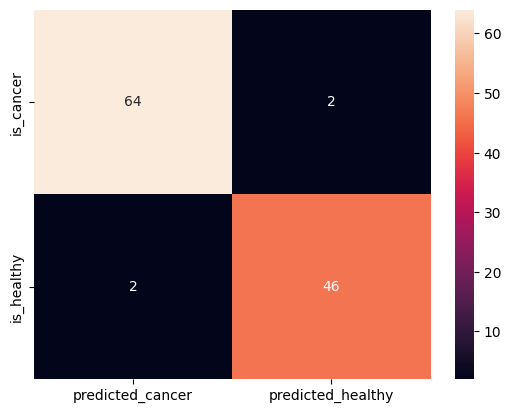

In [44]:
sns.heatmap(confusion, annot=True)

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        48
           1       0.97      0.97      0.97        66

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [46]:
# Initialize and use StandardScaler to normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)     # Fit and transform thr training data
X_test = scaler.transform(X_test)           # Only transform the test data.

**KNN**

In [47]:
# Train a K-Nearest Neighbor (KNN) model
knn = KNeighborsClassifier()                           # Initialize KNN model.
params_knn = {'n_neighbors': np.arange(1, 25)}         # n_neighbors in KNeighborsClassifier() indicates the number of neighbors K.
knn_gs = GridSearchCV(knn, params_knn, cv=5)           # Initialize GridSearchCV to find an optimal value of K.
knn_gs.fit(X_train, y_train)                           # Fit GridSearch in training set to find the optimal K.

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [48]:
# Best number of neighbors K
knn_best = knn_gs.best_estimator_
print(knn_gs.best_params_)

{'n_neighbors': 21}


**Boosting SVM**

In [49]:
# Train a Support Vector Machine (SVM) model
svm = SVC()

# C is a hyperparameter that controls the trade-off between training error and margin maximization.
# Higher C: Stricter enforcement of correct classification for all training points, and less emphasis on margin maximization.
# Lower C: More tolerance for misclassifications on the training data, and more emphasis on margin maximization.

params_svm = {"C": [0.1, 1, 10, 100]}

svm_gs = GridSearchCV(svm, params_svm, cv=5)    # Initialize GridSearchCV to find an optimal value if the hyperparameter C.
svm_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), param_grid={'C': [0.1, 1, 10, 100]})

In [50]:
# Best value of the hyperparameter C.
svm_best = svm_gs.best_estimator_
print(svm_gs.best_params_)

{'C': 1}


**Random Forest**

In [51]:
# Train a Random Forest classifier
rf = RandomForestClassifier()                        # Initialize a Random Forest Classifier.
params_rf = {'n_estimators': [50, 100, 200]}         # n_estimator in RandomForestClassifier(...) indicates the number of Trees in the Forest.
rf_gs = GridSearchCV(rf, params_rf, cv=5)            # Initialize GridSearchCV to find an optimal number of Trees.
rf_gs.fit(X_train, y_train)                          # Fit GridSearch in training set to find the optimal number of Trees.

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [50, 100, 200]})

In [52]:
# Best number of Trees.
rf_best = rf_gs.best_estimator_
print(rf_gs.best_params_)

{'n_estimators': 100}


Logistic Regression

In [53]:
# Train a Logistic Regression model
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)   # Initialize Logistic Regression model.
log_reg.fit(X_train, y_train)                                 # Fit the model to training set.

LogisticRegression(max_iter=1000)

**Model Testing**

In [54]:
# Print accuracy of single models on the test set
print('KNN: {}'.format(knn_best.score(X_test, y_test)))                     # KNN accuracy
print('SVM: {}'.format(svm_best.score(X_test, y_test)))                     # SVM accuracy
print('Random Forest: {}'.format(rf_best.score(X_test, y_test)))            # Random Forest accuracy
print('Logistic Regression: {}'.format(log_reg.score(X_test, y_test)))      # Logistic Regression accuracy

KNN: 0.9473684210526315
SVM: 0.9649122807017544
Random Forest: 0.956140350877193
Logistic Regression: 0.956140350877193


**Model Ensembling**

In [55]:
# Ensemble the four models using hard (majority) voting
estimators=[('knn', knn_best), ('svm', svm_best), ('rf', rf_best), ('log_reg', log_reg)]    # Initialize base models in the ensemble
ensemble = VotingClassifier(estimators, voting='hard')                                      # Define how to ensemble them, i.e., hard voting

In [56]:
# Train the model ensemble on the training set
ensemble.fit(X_train, y_train)          # Train the ensemble on the training set
ensemble.score(X_test, y_test)          # Test the ensemble on the test set

0.9473684210526315

**Bagging with SVM**

In [57]:
# Creating a Support Vector Machine Classifier as the base estimator
base_svm = SVC(kernel='linear', C=1.0)

In [58]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [59]:
# Create a Bagging Classifier with SVM as the base model
# estimator: the base model
# n_estimators: the number of base models to use
# max_samples: the fraction (if float) or the number of samples (if integer) to draw from X_train to train each base estimator (with replacement by default, i.e., bootstrap)
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
bagging_clf = BaggingClassifier(estimator=base_svm, n_estimators=10, max_samples=0.5)

In [60]:
# Training the Bagging Classifier
bagging_clf.fit(X_train, y_train)

BaggingClassifier(estimator=SVC(kernel='linear'), max_samples=0.5)

In [61]:
# Making predictions on the test set
y_pred = bagging_clf.predict(X_test)

# Evaluating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9385964912280702


**Boosting with AdaBoost, Gradient Boosting and XGBoost**

In [62]:
# Create an AdaBoost Classifier with Decision Tree as the base model
# estimator: the base model
# n_estimators: the number of base models to use
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
ada_clf = AdaBoostClassifier(estimator = DecisionTreeClassifier(), n_estimators=10)

# Train the AdaBoost Classifier
ada_clf.fit(X_train, y_train)

# Making predictions on the test set
y_pred_ada = ada_clf.predict(X_test)

# Evaluating the accuracy of the model
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print("AdaBoost Classifier Accuracy:", accuracy_ada)

AdaBoost Classifier Accuracy: 0.9298245614035088


**Gradient Boosting**

In [63]:
# Create a Gradient Boosting Classifier which uses Decision Tree as boosting model by default
# n_estimators: the number of boosting stages to perform.
# learning_rate: learning rate shrinks the contribution of each tree by learning_rate, i.e., f_0 + lr*delta_1 + lr*delta_2 + ...
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
gb_clf = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1)

# Train the Gradient Boosting Classifier
gb_clf.fit(X_train, y_train)

# Making predictions on the test set
y_pred_gb = gb_clf.predict(X_test)

# Evaluating the accuracy of the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Classifier Accuracy:", accuracy_gb)

Gradient Boosting Classifier Accuracy: 0.9473684210526315


**XG BOOST**

In [64]:
import xgboost as xgb
# Create an XGBoost Classifier
# n_estimators: the number of boosting stages to perform.
# learning_rate: learning rate shrinks the contribution of each tree by learning_rate, i.e., f_0 + lr*delta_1 + lr*delta_2 + ...
# Reference: https://xgboost.readthedocs.io/en/latest/python/python_api.html


xgb_model = xgb.XGBClassifier()  # Base XGBoost classifier
xgb_model.fit(X_train_normalized, y_train)

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [50, 100, 200],
    'gamma': [0, 0.1, 0.2],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

grid_xgb = GridSearchCV(xgb_model, param_grid, refit=True, verbose=2)
grid_xgb.fit(X_train_normalized, y_train)

# Best model
best_xgb = grid_xgb.best_estimator_

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.5s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, m

In [65]:
# Evaluation
best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_normalized)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

Accuracy: 0.9298245614035088
Confusion Matrix:
 [[47  1]
 [ 7 59]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92        48
           1       0.98      0.89      0.94        66

    accuracy                           0.93       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.93      0.93       114



In [66]:
cm = np.array(confusion_matrix(y_test, y_pred_xgb, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,59,7
is_healthy,1,47


<Axes: >

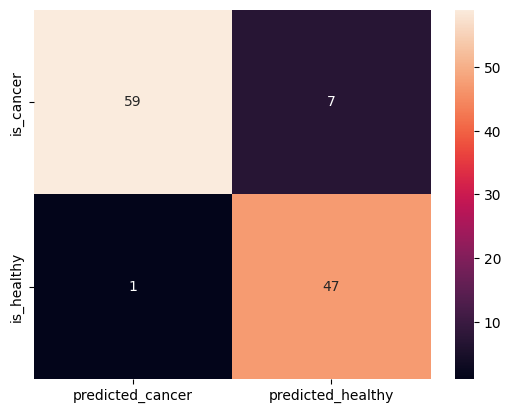

In [67]:
sns.heatmap(confusion, annot=True)